<a href="https://colab.research.google.com/github/ShaikMahabunny/oasis-infobyte-tasks/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files


uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [3]:
import pandas as pd
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Check for missing values:**

In [5]:
print("Missing value counts:")
print(data.isnull().sum())

Missing value counts:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


**Data Visualization:**

<ipython-input-6-18b844f0e420>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


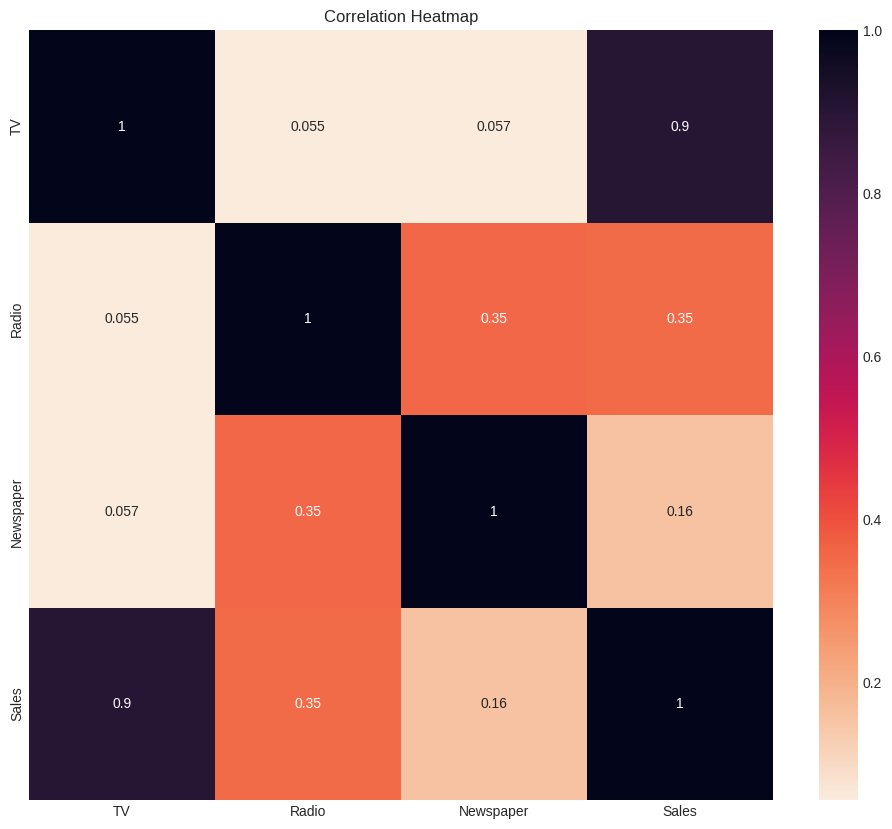

In [6]:
# Setting the style and creating a correlation heatmap
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'rocket_r')
plt.title("Correlation Heatmap")
plt.show()

**Pairplot for visualization of relationships:**

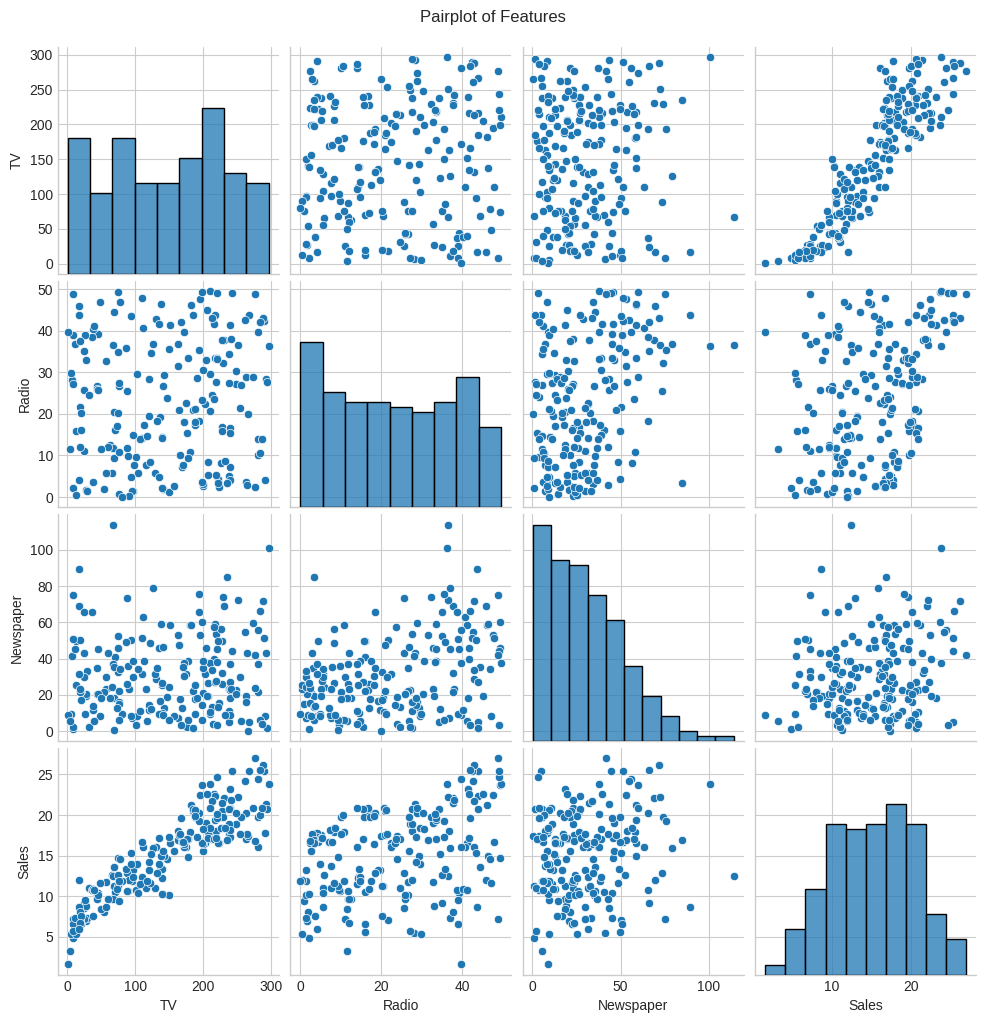

In [8]:
sns.pairplot(data)
plt.suptitle("Pairplot of Features", y = 1.02)
plt.show()

**Histogram of Sales:**

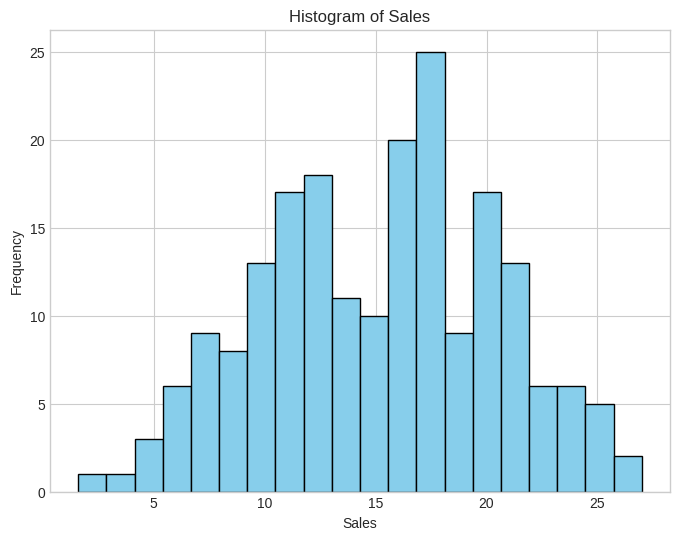

In [9]:
plt.figure(figsize = (8, 6))
plt.hist(data['Sales'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

**Model building:**

In [10]:
# Preparing data for modeling
x = np.array(data.drop(["Sales"], axis = 1))
y = np.array(data["Sales"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

**Linear Regression Model:**

In [11]:
# Training and evaluating Linear Regression model
print("Linear Regression Model")
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

Linear Regression Model
Mean Squared Error: 2.9077569102710923
R-squared: 0.9059011844150826


In [12]:
predicted_data = pd.DataFrame(data = {"Actual Sales": y_test, "Predicted Sales": y_pred_linear.flatten()})

# Displaying a sample of the DataFrame
print("Sample of Predicted vs Actual Sales:")
print(predicted_data.head(10))  # Displaying first 10 rows

Sample of Predicted vs Actual Sales:
   Actual Sales  Predicted Sales
0          16.9        17.034772
1          22.4        20.409740
2          21.4        23.723989
3           7.3         9.272785
4          24.7        21.682719
5          12.6        12.569402
6          22.3        21.081195
7           8.4         8.690350
8          16.5        17.237013
9          16.1        16.666575


**Decision Tree Model:**

In [13]:
# Training and evaluating Decision Tree model
print("Decision Tree Model")
tree_model = DecisionTreeRegressor(random_state = 42)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R-squared:", r2_score(y_test, y_pred_tree))

Decision Tree Model
Mean Squared Error: 3.4019999999999997
R-squared: 0.8899068317956319


In [14]:
predicted_data = pd.DataFrame(data = {"Actual Sales": y_test, "Predicted Sales": y_pred_tree.flatten()})

# Displaying a sample of the DataFrame
print("Sample of Predicted vs Actual Sales:")
print(predicted_data.head(10))  # Displaying first 10 rows

Sample of Predicted vs Actual Sales:
   Actual Sales  Predicted Sales
0          16.9             17.5
1          22.4             23.8
2          21.4             19.6
3           7.3              6.6
4          24.7             23.8
5          12.6             13.3
6          22.3             22.6
7           8.4              9.7
8          16.5             16.7
9          16.1             17.1


**Random Forest Model:**

In [15]:
# Training and evaluating Random Forest model
print("Random Forest Model")
forest_model = RandomForestRegressor(random_state = 42)
forest_model.fit(x_train, y_train)
y_pred_forest = forest_model.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("R-squared:", r2_score(y_test, y_pred_forest))

Random Forest Model
Mean Squared Error: 1.4374328500000009
R-squared: 0.9534827934927883


In [16]:
predicted_data = pd.DataFrame(data = {"Actual Sales": y_test, "Predicted Sales": y_pred_forest.flatten()})

# Displaying a sample of the DataFrame
print("Sample of Predicted vs Actual Sales:")
print(predicted_data.head(10))  # Displaying first 10 rows

Sample of Predicted vs Actual Sales:
   Actual Sales  Predicted Sales
0          16.9           17.299
1          22.4           22.482
2          21.4           19.770
3           7.3            6.784
4          24.7           22.961
5          12.6           13.471
6          22.3           22.595
7           8.4            9.579
8          16.5           16.887
9          16.1           16.793
